In [10]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Завдання 1-2
# Посилання на датасет: https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021
suicide = pandas.read_csv("/home/anatoliy/Downloads/master.csv")
print(suicide.columns)
print("Raws,Columns:")
print(suicide.shape)
suicide = suicide.dropna() 
suicide.isnull().sum()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')
Raws,Columns:
(31756, 12)


country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [3]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13.0,232900,5.58,Albania1995,0.619,"2,42,44,99,009",835.0,Generation X
73,Albania,1995,male,55-74 years,9.0,178000,5.06,Albania1995,0.619,"2,42,44,99,009",835.0,Silent
74,Albania,1995,female,75+ years,2.0,40800,4.90,Albania1995,0.619,"2,42,44,99,009",835.0,G.I. Generation
75,Albania,1995,female,15-24 years,13.0,283500,4.59,Albania1995,0.619,"2,42,44,99,009",835.0,Generation X
76,Albania,1995,male,15-24 years,11.0,241200,4.56,Albania1995,0.619,"2,42,44,99,009",835.0,Generation X


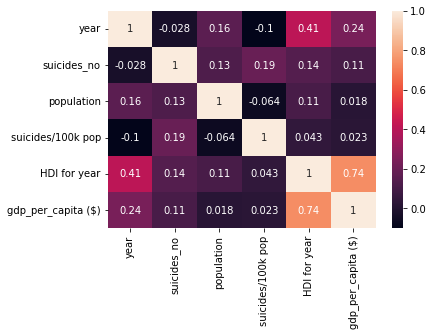

In [14]:
#Завдання 3 
suicide_only_numbers  = suicide.drop(columns=['sex', 'age', 'country-year', 'generation', ' gdp_for_year ($) '], axis=1).set_index('country') #Getting numbers
correlation = suicide_only_numbers.corr()
sea.heatmap(correlation, annot=True)
plot.show()

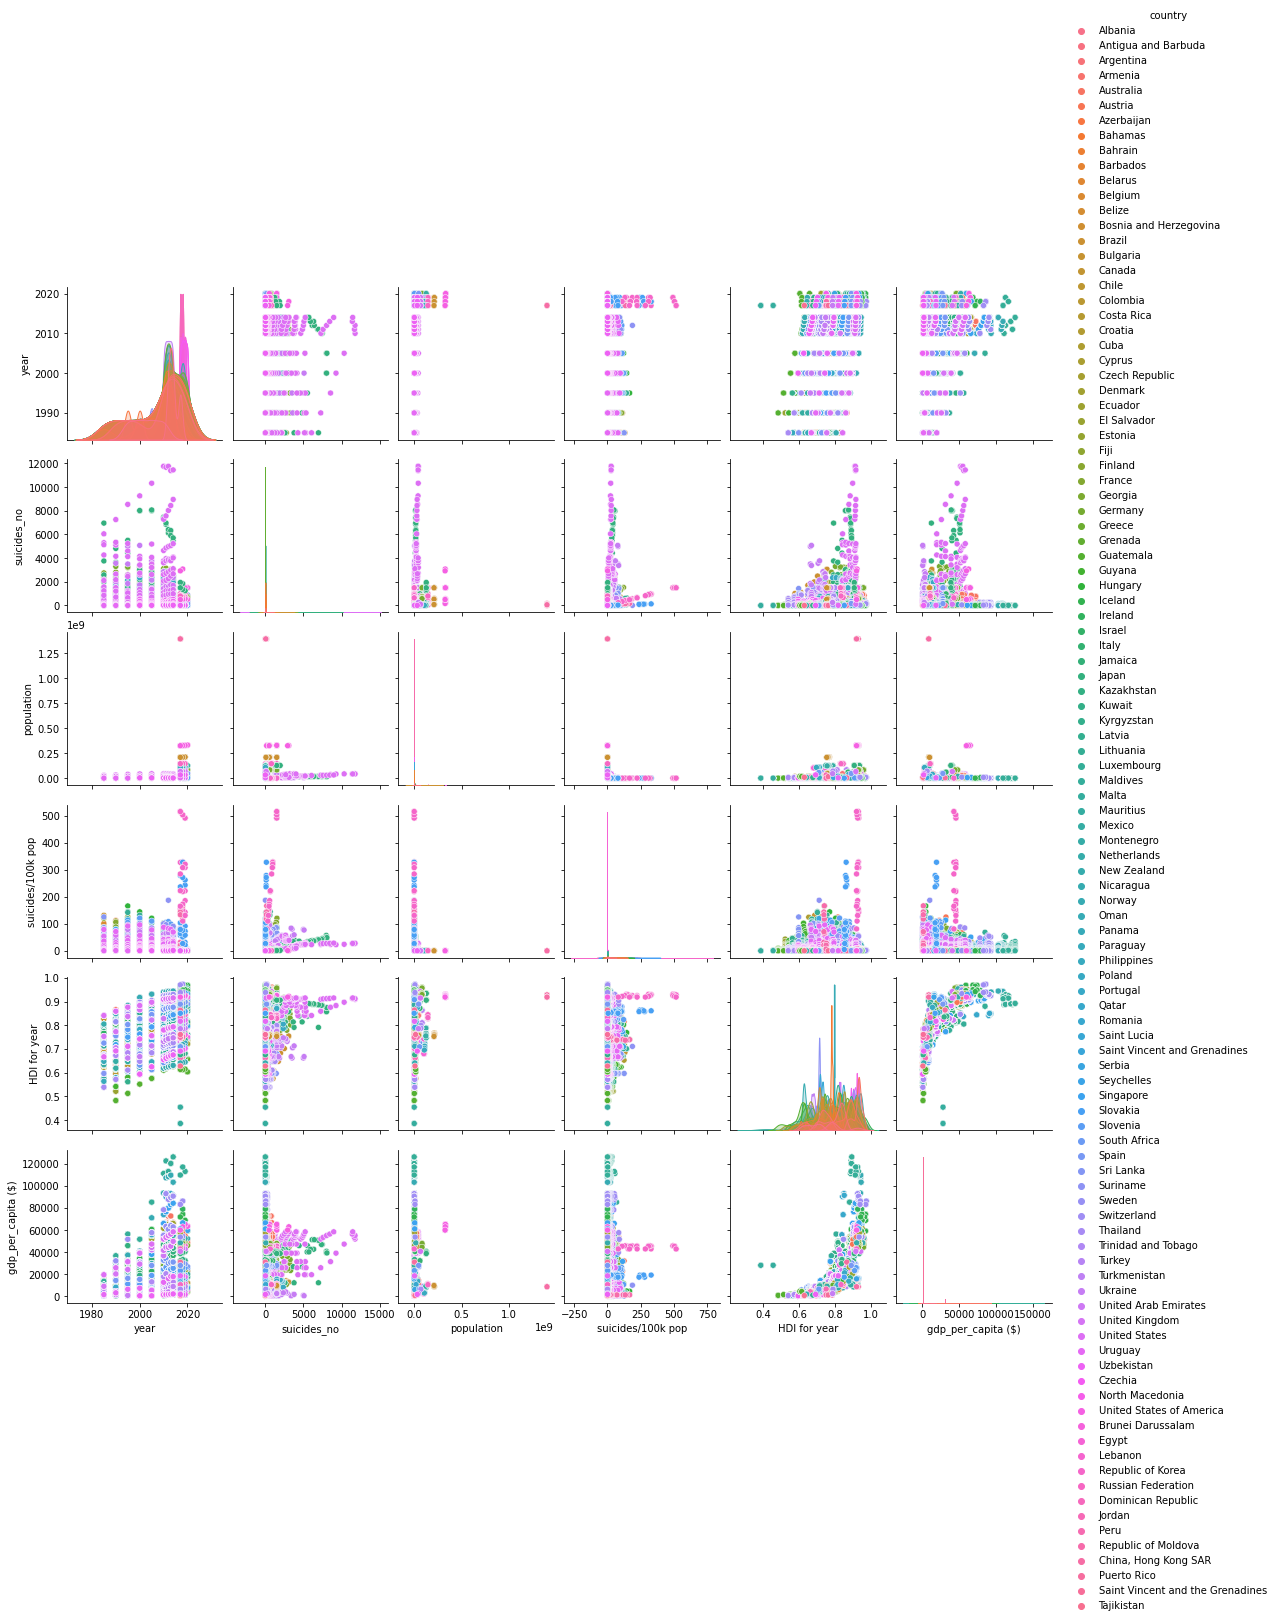

In [5]:
sea.pairplot(suicide, hue="country")

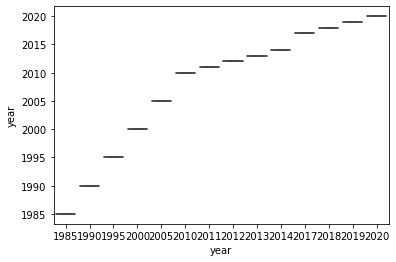

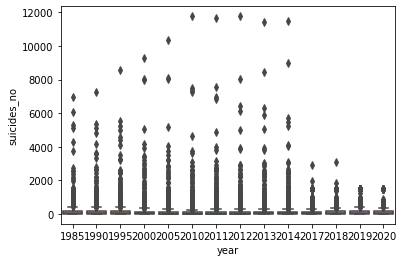

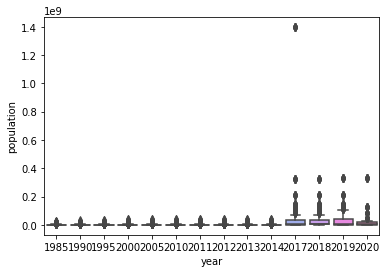

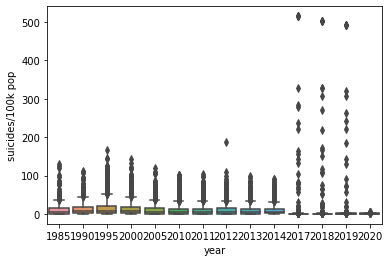

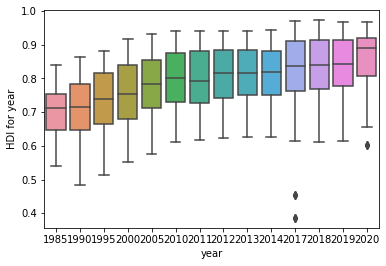

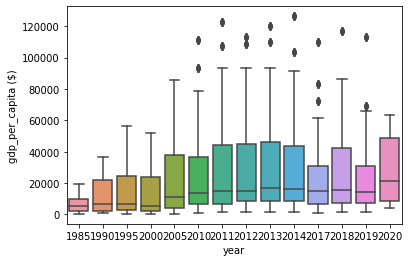

In [6]:
for i in suicide_only_numbers.columns:
    figure = plot.figure()
    sea.boxplot(data=suicide_only_numbers, x='year', y=suicide_only_numbers[i])

In [7]:
#Завдання 4
X = suicide_only_numbers.drop(['year'], axis=1)
Y = suicide_only_numbers['year']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
print(X_train.shape)
print(Y_train.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

(7770, 5)
(7770,)


In [8]:
#Знаходимо класифікатор кнн
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
knn_prediction = knn.predict(X_test)
print(classification_report(Y_test,knn_prediction))
print(confusion_matrix(Y_test,knn_prediction))
print("Accuracy score:", accuracy_score(Y_test,knn_prediction))

              precision    recall  f1-score   support

        1985       0.30      0.43      0.36       131
        1990       0.35      0.46      0.40       175
        1995       0.36      0.42      0.39       222
        2000       0.46      0.48      0.47       263
        2005       0.41      0.44      0.43       272
        2010       0.36      0.47      0.41       306
        2011       0.27      0.28      0.28       280
        2012       0.31      0.23      0.26       293
        2013       0.21      0.18      0.19       274
        2014       0.34      0.15      0.21       298
        2017       0.53      0.59      0.56       286
        2018       0.40      0.43      0.41       239
        2019       0.44      0.33      0.38       219
        2020       0.40      0.46      0.43        72

    accuracy                           0.37      3330
   macro avg       0.37      0.38      0.37      3330
weighted avg       0.37      0.37      0.36      3330

[[ 56  10   9  13  20   9

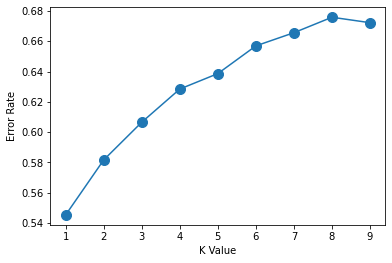

In [11]:
#шукаємо оптимальне значення knn
error = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    prediction_i = knn.predict(X_test)
    error.append(numpy.mean(prediction_i != Y_test))
plot.plot(range(1,10), error, marker='o', markersize=10)
plot.xlabel('K Value')
plot.ylabel('Error Rate')
plot.show()

In [12]:
# Бачимо що k=1 найкращій варіант
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
knn_prediction = knn.predict(X_test)
print(classification_report(Y_test,knn_prediction))
print(confusion_matrix(Y_test,knn_prediction))
print("Accuracy score:", accuracy_score(Y_test,knn_prediction))

              precision    recall  f1-score   support

        1985       0.45      0.41      0.43       131
        1990       0.49      0.51      0.50       175
        1995       0.48      0.50      0.49       222
        2000       0.53      0.46      0.49       263
        2005       0.57      0.51      0.54       272
        2010       0.46      0.46      0.46       306
        2011       0.35      0.38      0.37       280
        2012       0.31      0.36      0.34       293
        2013       0.25      0.30      0.27       274
        2014       0.42      0.33      0.37       298
        2017       0.67      0.61      0.64       286
        2018       0.53      0.55      0.54       239
        2019       0.56      0.49      0.52       219
        2020       0.43      0.69      0.53        72

    accuracy                           0.45      3330
   macro avg       0.47      0.47      0.46      3330
weighted avg       0.46      0.45      0.46      3330

[[ 54   6   9  17  14   8